In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

データの読み込み

In [233]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all = pd.concat([train, test])

In [234]:
print(train.shape)
train.info()

(27128, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [235]:
display(train.head(), test.head())

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown


探索的データ分析

数値データ

In [236]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [237]:
np.corrcoef(train['campaign'], train['y'])[0]

array([ 1.        , -0.07611784])

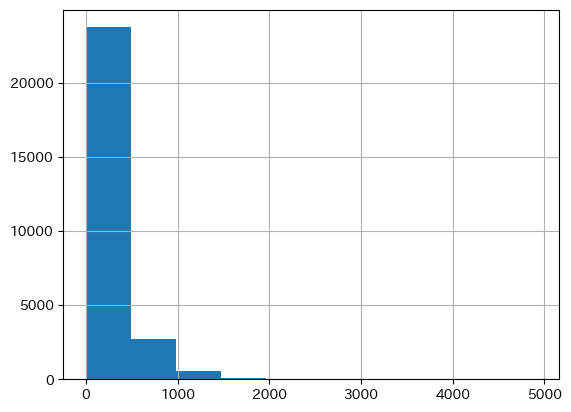

In [238]:
train['duration'].hist();

カテゴリデータ

In [239]:
display(train.describe(include='O'), test.describe(include='O'))

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27128,27128,27128,27128,27128,27128,27128,27128,27128
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5886,16411,13882,26644,15125,22788,17580,8317,22150


,job,marital,education,default,housing,loan,contact,month,poutcome
count,18083,18083,18083,18083,18083,18083,18083,18083,18083
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,3846,10803,9320,17752,10005,15179,11705,5449,14809


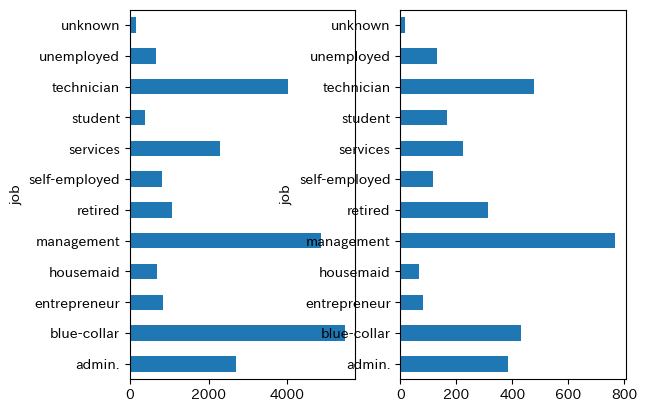

In [240]:
fig, axs = plt.subplots(1, 2)
train[train['y']==0].groupby('job')['y'].count().plot.barh(ax=axs[0])
train[train['y']==1].groupby('job')['y'].count().plot.barh(ax=axs[1]);

yとの相関

数値データ

In [241]:
# 数値データとyの相関係数
train.select_dtypes(include=['int64', 'float64']).corr()

,id,age,balance,day,duration,campaign,pdays,previous,y
id,1.000000,-0.005716,-0.000484,0.002974,0.002705,0.016867,-0.004526,-0.005425,-0.003555
age,-0.005716,1.000000,0.095343,-0.008518,-0.005309,-0.001340,-0.025272,0.002946,0.020892
balance,-0.000484,0.095343,1.000000,0.002067,0.019923,-0.016295,0.003613,0.012483,0.045826
day,0.002974,-0.008518,0.002067,1.000000,-0.032453,0.164880,-0.096889,-0.050009,-0.031058
duration,0.002705,-0.005309,0.019923,-0.032453,1.000000,-0.087771,0.002030,0.002489,0.401390
campaign,0.016867,-0.001340,-0.016295,0.164880,-0.087771,1.000000,-0.086220,-0.031557,-0.076118
pdays,-0.004526,-0.025272,0.003613,-0.096889,0.002030,-0.086220,1.000000,0.421606,0.100930
previous,-0.005425,0.002946,0.012483,-0.050009,0.002489,-0.031557,0.421606,1.000000,0.083825
y,-0.003555,0.020892,0.045826,-0.031058,0.401390,-0.076118,0.100930,0.083825,1.000000


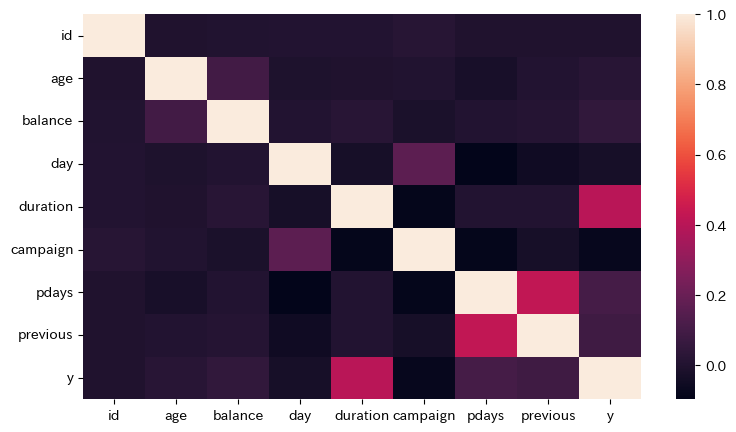

In [242]:
# ヒートマップで可視化
plt.figure(figsize=(9, 5))
sns.heatmap(train.select_dtypes(include=['int64', 'float64']).corr());

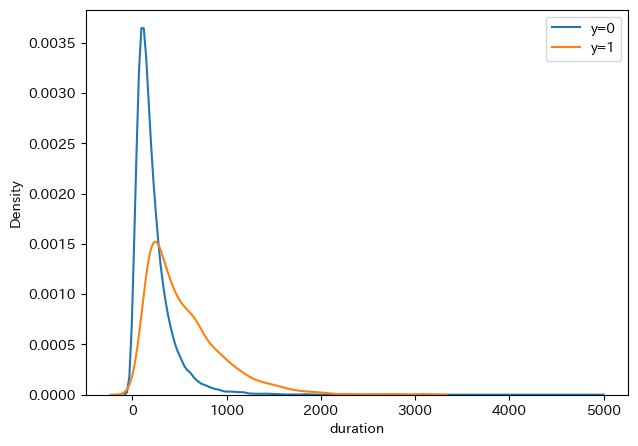

In [243]:
# 連続値の可視化は確率密度関数を使う(kdeplot)
plt.figure(figsize=(7, 5))
sns.kdeplot(train[train['y']==0]['duration'],label='y=0')
sns.kdeplot(train[train['y']==1]['duration'],label='y=1')
plt.legend();

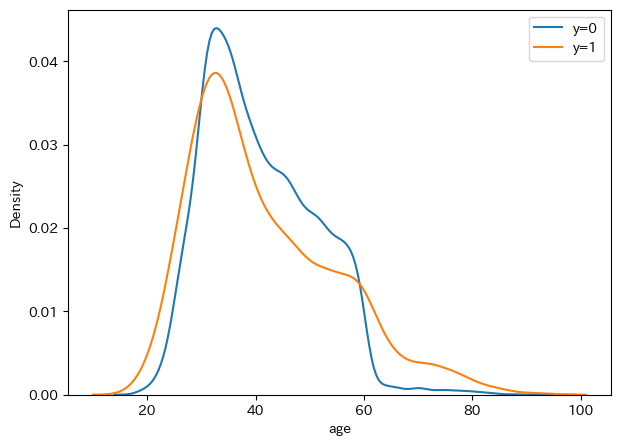

In [257]:
# 連続値の可視化は確率密度関数を使う(kdeplot)
plt.figure(figsize=(7, 5))
sns.kdeplot(train[train['y']==0]['age'],label='y=0')
sns.kdeplot(train[train['y']==1]['age'],label='y=1')
plt.legend();

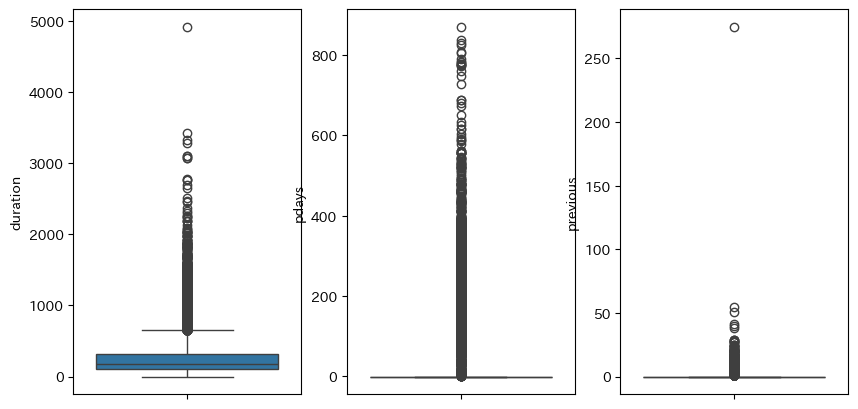

In [245]:
# 箱ひげ図で確認
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(train['duration'])
plt.subplot(1, 3, 2)
sns.boxplot(train['pdays'])
plt.subplot(1, 3, 3)
sns.boxplot(train['previous']);

カテゴリデータとｙとの相関

Text(0.5, 1.0, '職種別申し込み確率')

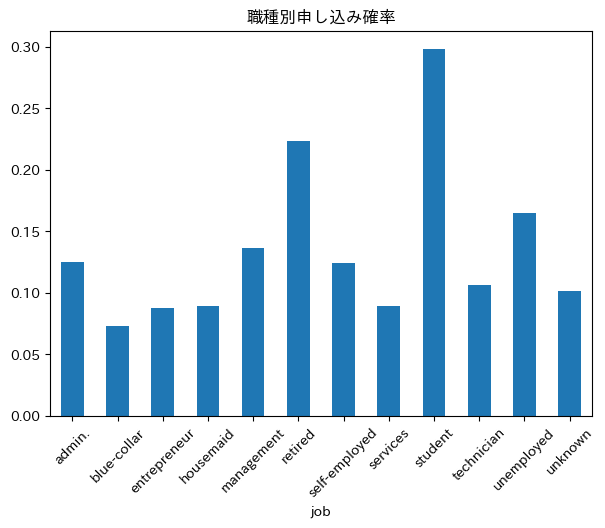

In [246]:
# 職種別申し込み確率
plt.figure(figsize=(7, 5))
train.groupby(train['job'])['y'].mean().plot.bar()
plt.xticks(rotation=45)
plt.title('職種別申し込み確率')

職種別申し込み確率(jr)をデータフレームに追加

In [247]:
jr = train.groupby(train['job'])['y'].mean()

In [248]:
df_jr = pd.DataFrame(jr)
df_jr = df_jr.rename(columns={'y':'jr'})

In [249]:
train = pd.merge(train,df_jr, on='job', how='left')
all = pd.merge(all,df_jr, on='job', how='left')

Text(0.5, 1.0, '教育水準別申し込み確率')

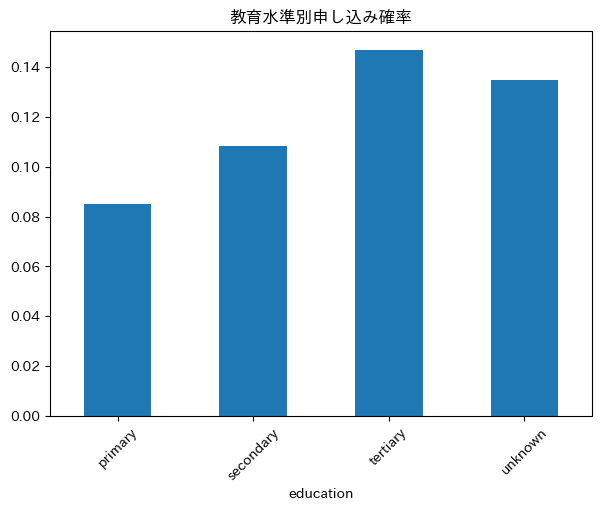

In [250]:
# 教育水準別申し込み確率
plt.figure(figsize=(7, 5))
train.groupby(train['education'])['y'].mean().plot.bar()
plt.xticks(rotation=45)
plt.title('教育水準別申し込み確率')

Text(0.5, 1.0, '既婚未婚別申し込み確率')

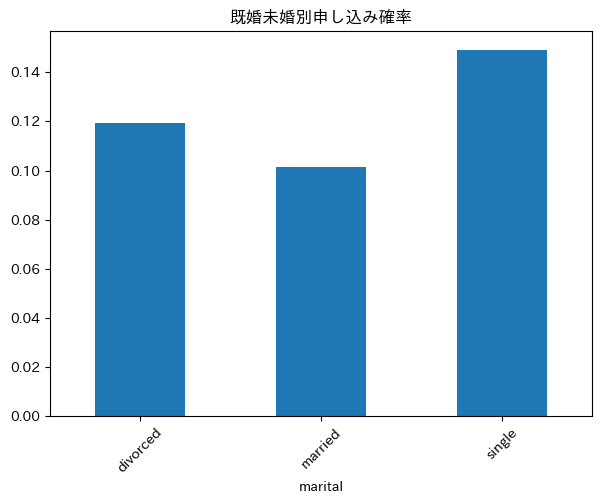

In [251]:
# 既婚未婚別申し込み確率
plt.figure(figsize=(7, 5))
train.groupby(train['marital'])['y'].mean().plot.bar()
plt.xticks(rotation=45)
plt.title('既婚未婚別申し込み確率')

In [210]:
train['marital'].value_counts()

marital
married     16411
single       7662
divorced     3055
Name: count, dtype: int64

In [252]:
train['ms'] = train['marital'].apply(lambda x: 0 if x == 'single' else 1).astype('int64')
all['ms'] = all['marital'].apply(lambda x: 0 if x == 'single' else 1).astype('int64')

Text(0.5, 1.0, 'default別申し込み確率')

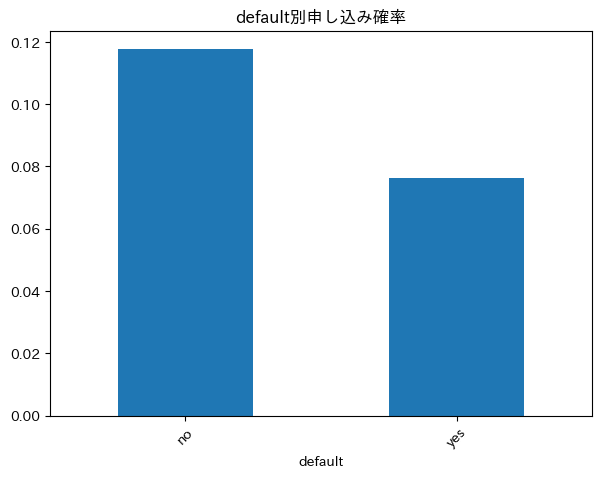

In [259]:
# default別申し込み確率
plt.figure(figsize=(7, 5))
train.groupby(train['default'])['y'].mean().plot.bar()
plt.xticks(rotation=45)
plt.title('default別申し込み確率')

In [260]:
train['df'] = train['default'].apply(lambda x: 0 if x == 'no' else 1).astype('int64')
all['df'] = all['default'].apply(lambda x: 0 if x == 'no' else 1).astype('int64')

Text(0.5, 1.0, '住宅ローン有無別申し込み確率')

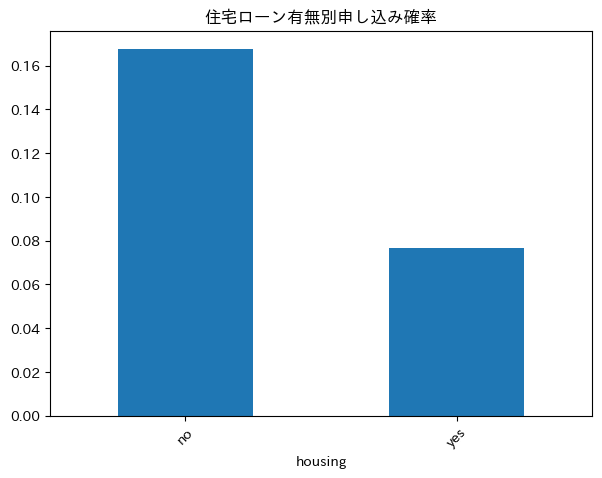

In [262]:
# 住宅ローン有無別申し込み確率
plt.figure(figsize=(7, 5))
train.groupby(train['housing'])['y'].mean().plot.bar()
plt.xticks(rotation=45)
plt.title('住宅ローン有無別申し込み確率')

In [263]:
train['hs'] = train['housing'].apply(lambda x: 0 if x == 'no' else 1).astype('int64')
all['hs'] = all['housing'].apply(lambda x: 0 if x == 'no' else 1).astype('int64')

In [266]:
np.corrcoef(train['hs'], train['y'])

array([[ 1.        , -0.14030653],
       [-0.14030653,  1.        ]])

Text(0.5, 1.0, 'ローン有無別申し込み確率')

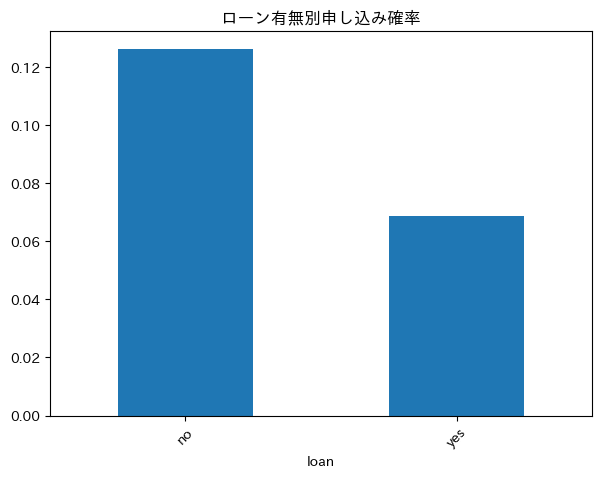

In [267]:
# ローン有無別申し込み確率
plt.figure(figsize=(7, 5))
train.groupby(train['loan'])['y'].mean().plot.bar()
plt.xticks(rotation=45)
plt.title('ローン有無別申し込み確率')

In [269]:
train['ln'] = train['loan'].apply(lambda x: 0 if x == 'no' else 1).astype('int64')
all['ln'] = all['loan'].apply(lambda x: 0 if x == 'no' else 1).astype('int64')

In [270]:
np.corrcoef(train['ln'], train['y'])

array([[ 1.        , -0.06562954],
       [-0.06562954,  1.        ]])

Text(0.5, 1.0, 'コンタクト別申し込み確率')

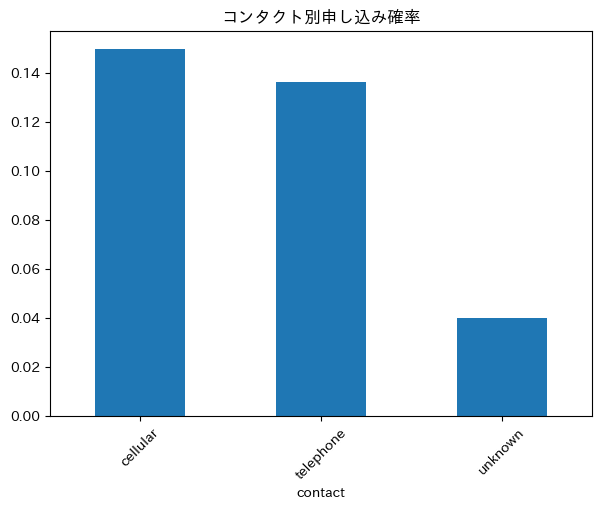

In [271]:
# コンタクト別申し込み確率
plt.figure(figsize=(7, 5))
train.groupby(train['contact'])['y'].mean().plot.bar()
plt.xticks(rotation=45)
plt.title('コンタクト別申し込み確率')

Text(0.5, 1.0, '月別申し込み確率')

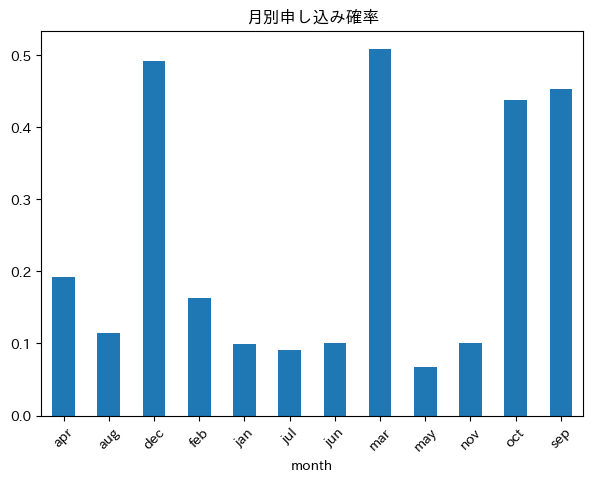

In [272]:
# 月別申し込み確率
plt.figure(figsize=(7, 5))
train.groupby(train['month'])['y'].mean().plot.bar()
plt.xticks(rotation=45)
plt.title('月別申し込み確率')

<Axes: xlabel='month'>

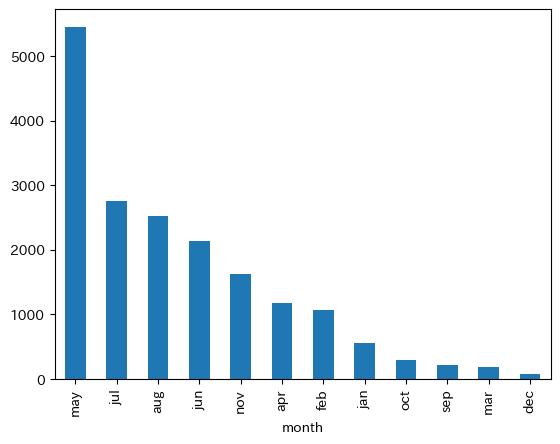

In [274]:
test['month'].value_counts().plot.bar()

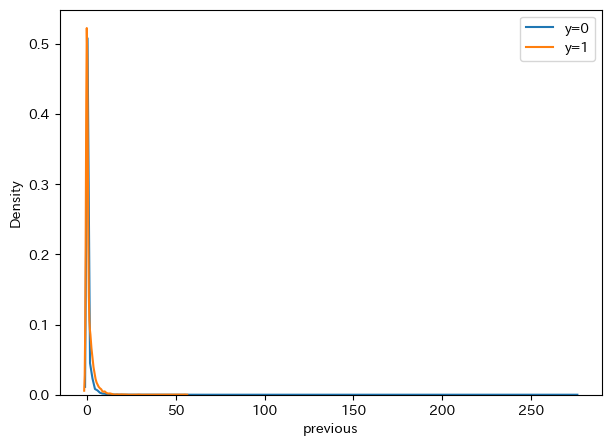

In [276]:
# 連続値の可視化は確率密度関数を使う(kdeplot)
plt.figure(figsize=(7, 5))
sns.kdeplot(train[train['y']==0]['previous'],label='y=0')
sns.kdeplot(train[train['y']==1]['previous'],label='y=1')
plt.legend();

データの整理、前処理

In [278]:
all.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'jr', 'ms', 'df', 'hs', 'ln'],
      dtype='object')

In [396]:
# 特徴量の選定
use_columns = ['age', 'education', 'balance', 'day', 'duration', 'campaign', 'previous', 'jr', 'ms', 'df', 'hs', 'ln']

In [397]:
# allをtrainとtestに分割
train = all[~all['y'].isnull()]
test = all[all['y'].isnull()]

In [398]:
y = train['y']
train = train[use_columns]
test = test[use_columns]

In [399]:
# ダミー変数化
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [400]:
display(train.head(), test.head())

,age,balance,day,duration,campaign,previous,jr,ms,df,hs,ln,education_secondary,education_tertiary,education_unknown
0,39,1756,3,939,1,0,0.073055,1,0,1,0,True,False,False
1,51,1443,18,172,10,0,0.087527,1,0,0,0,False,False,False
2,36,436,13,567,1,2,0.136477,0,0,0,0,False,True,False
3,63,474,25,423,1,0,0.223580,1,0,0,0,True,False,False
4,31,354,30,502,1,2,0.136477,0,0,0,0,False,True,False


,age,balance,day,duration,campaign,previous,jr,ms,df,hs,ln,education_secondary,education_tertiary,education_unknown
27128,30,1028,4,1294,2,0,0.136477,0,0,0,0,False,True,False
27129,39,426,18,1029,1,0,0.123810,0,0,0,0,False,True,False
27130,38,-572,5,26,24,0,0.106435,0,0,1,1,False,True,False
27131,34,-476,27,92,4,0,0.106435,0,0,1,0,True,False,False
27132,37,62,31,404,2,0,0.087527,1,0,0,0,False,False,False


In [407]:
# durationが大きいので標準化
ss = StandardScaler()
ss.fit(train, test)
train_ss = pd.DataFrame(ss.transform(train), columns=train.columns)
test_ss = pd.DataFrame(ss.transform(test), columns=test.columns)

In [408]:
display(train_ss.head(), test_ss.head())

,age,balance,day,duration,campaign,previous,jr,ms,df,hs,ln,education_secondary,education_tertiary,education_unknown
0,-0.183913,0.133255,-1.535932,2.607931,-0.560291,-0.231559,-0.990267,0.627383,-0.134779,0.890835,-0.436407,0.976824,-0.644361,-0.209155
1,0.947272,0.029035,0.263115,-0.341083,2.318294,-0.231559,-0.664145,0.627383,-0.134779,-1.122542,-0.436407,-1.023726,-0.644361,-0.209155
2,-0.466709,-0.306269,-0.336567,1.177640,-0.560291,0.567288,0.438864,-1.593923,-0.134779,-1.122542,-0.436407,-1.023726,1.551924,-0.209155
3,2.078457,-0.293616,1.102670,0.623979,-0.560291,-0.231559,2.401617,0.627383,-0.134779,-1.122542,-0.436407,0.976824,-0.644361,-0.209155
4,-0.938036,-0.333572,1.702352,0.927723,-0.560291,0.567288,0.438864,-1.593923,-0.134779,-1.122542,-0.436407,-1.023726,1.551924,-0.209155


,age,balance,day,duration,campaign,previous,jr,ms,df,hs,ln,education_secondary,education_tertiary,education_unknown
0,-1.032301,-0.109149,-1.415995,3.972859,-0.240448,-0.231559,0.438864,-1.593923,-0.134779,-1.122542,-0.436407,-1.023726,1.551924,-0.209155
1,-0.183913,-0.309598,0.263115,2.953969,-0.560291,-0.231559,0.153423,-1.593923,-0.134779,-1.122542,-0.436407,-1.023726,1.551924,-0.209155
2,-0.278178,-0.641905,-1.296059,-0.902434,6.796093,-0.231559,-0.238086,-1.593923,-0.134779,0.890835,2.291439,-1.023726,1.551924,-0.209155
3,-0.655240,-0.609940,1.342543,-0.648673,0.399238,-0.231559,-0.238086,-1.593923,-0.134779,0.890835,-0.436407,0.976824,-0.644361,-0.209155
4,-0.372444,-0.430800,1.822288,0.550926,-0.240448,-0.231559,-0.664145,0.627383,-0.134779,-1.122542,-0.436407,-1.023726,-0.644361,-0.209155


学習・検証

モデルは LR or RFC

In [409]:
# データの分割
X_train, X_valid, y_train, y_valid = train_test_split(train_ss, y, test_size=0.4, random_state=82, stratify=y)

In [410]:
# class_weightを設定することで不均衡データに対応
model = RFC(random_state=82, class_weight='balanced')

In [411]:
# 学習
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=82)

In [412]:
# 予測
train_pred = model.predict(X_train)
valid_pred = model.predict(X_valid)

In [413]:
# 精度確認
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_valid, valid_pred))

1.0
0.8891448580906746


In [414]:
# AUCスコア
train_proba = model.predict_proba(X_train)[:, 1]
valid_proba = model.predict_proba(X_valid)[:, 1]

print(roc_auc_score(y_train,train_proba))
print(roc_auc_score(y_valid,valid_proba))

1.0
0.8814445392196983


予測、結果の提出

In [365]:
# テストデータの予測
predict = model.predict_proba(test_ss)[:, 1]

In [371]:
# submit_sampleの読み込み、提出フォームの作成
submit=pd.read_csv('submit_sample.csv',header=None)
submit[1] = predict
submit.to_csv('submit.csv', index=False, header=None)

評価結果：0.8796389536164578